In [1]:
import numpy as np
import pandas as pd

<Axes: xlabel='x', ylabel='y'>

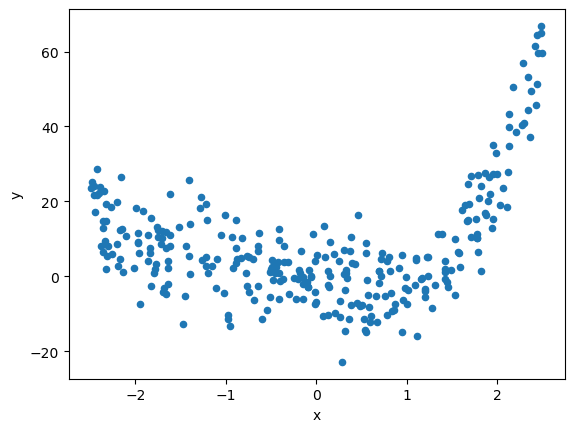

In [2]:
size = 300
X = np.random.rand(size)*5 - 2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8 - 4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv', index=None)
df.plot.scatter(x='x', y='y')

In [3]:
X=df[['x']]
y=df['y']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
import matplotlib.pyplot as plt

In [8]:
lin_reg.predict(X_test)

array([ 3.27950856, 11.75119424,  3.22663215,  3.30018826, 12.95118074,
        5.68159824,  6.52559277,  2.84104669, 12.76396179,  9.91157868,
       13.64398183, 11.0629675 , 10.14866656,  3.11476353,  4.56894884,
       12.19589345, 13.69206722, 12.06961477, 13.05980048, 10.50308016,
       13.52683886,  1.79091804,  6.8219708 ,  7.77490182,  6.97207855,
       12.32404958,  8.92154033,  8.96909599, 12.44637245,  4.526363  ,
       14.03776082,  3.44425587,  9.49878434,  4.20140898, 12.44421689,
        7.70649093,  8.07779348,  4.73734155,  3.66470751,  6.8336757 ,
        3.49709697,  2.29099252,  6.23470358,  8.61122526,  8.08343767,
        7.30117093,  7.51641452,  5.51593711,  8.11489211,  8.53087523,
        6.94493974, 10.2799216 , 13.12030722,  2.27044223, 11.60312749,
        8.72327846,  2.4321514 , 12.86354725,  5.40708144,  9.65291888])

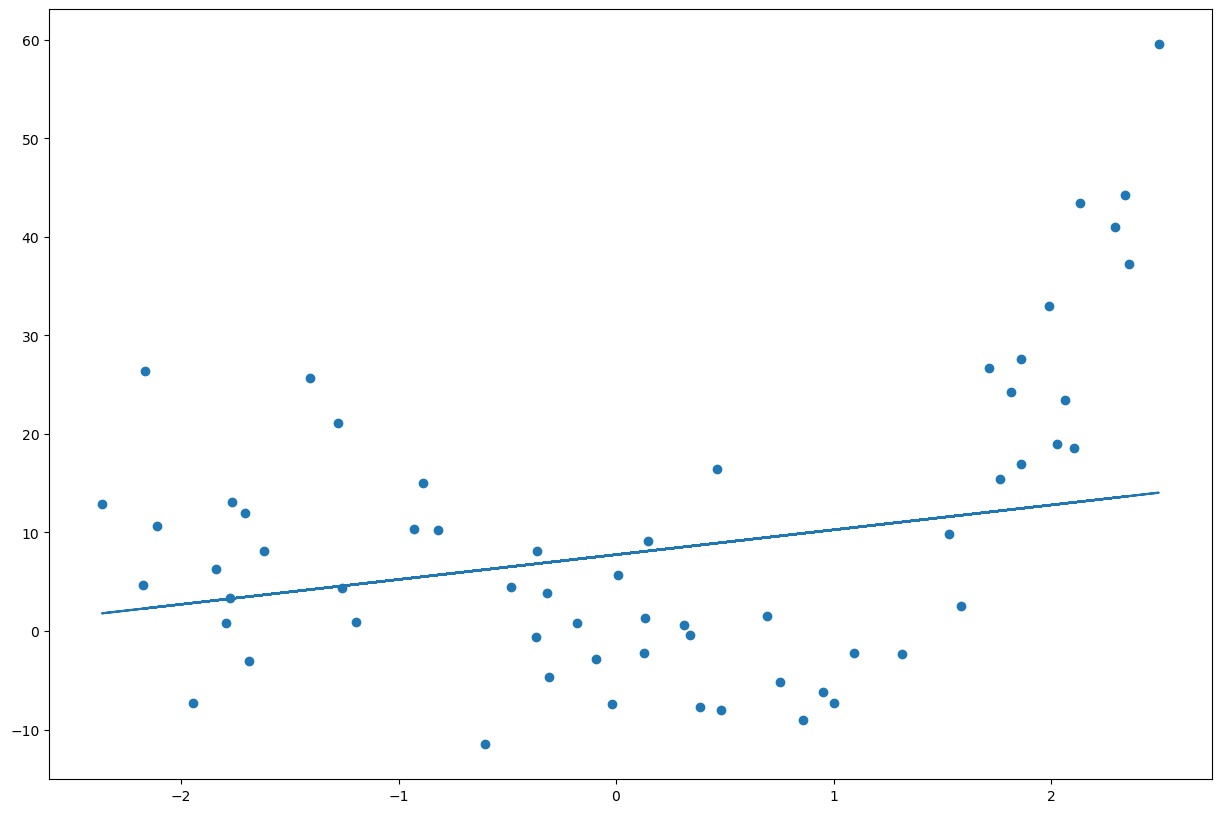

In [9]:
fig = plt.figure(figsize=(15, 10))
plt.scatter(X_test, y_test)
plt.plot(X_test, lin_reg.predict(X_test))

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [12]:
lin_reg_err = [mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)]

In [13]:
print(lin_reg_err)

[222.6746002276063, 198.81011730209994]


In [14]:
linear_regressor = (lin_reg, None)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

In [16]:
X = df[['x']]
y = df['y']

In [17]:
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = lin_reg.predict(X_plot_poly)

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


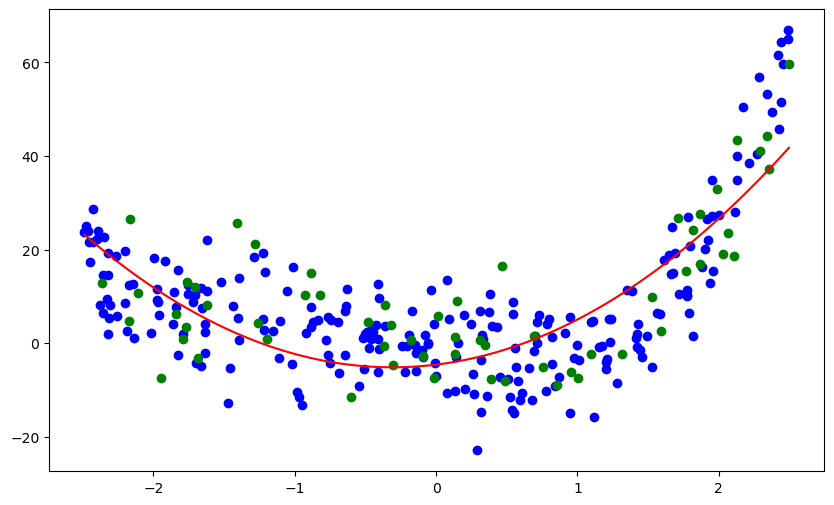

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_plot, y_plot, color='red', label='Polynomial Regression (degree=2)')

In [19]:
poly_reg_err = []
poly_regressors = []

def linear_regression(degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)

    y_train_pred = lin_reg.predict(poly_features.fit_transform(X_train))
    y_test_pred = lin_reg.predict(poly_features.fit_transform(X_test))

    poly_regressors.append((lin_reg, poly_features))

    poly_reg_err.append([mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)])

    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    y_plot = lin_reg.predict(X_plot_poly)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='green', label='Testing Data')
    plt.plot(X_plot, y_plot, color='red', label='Polynomial Regression (degree=2)')
    plt.grid()

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


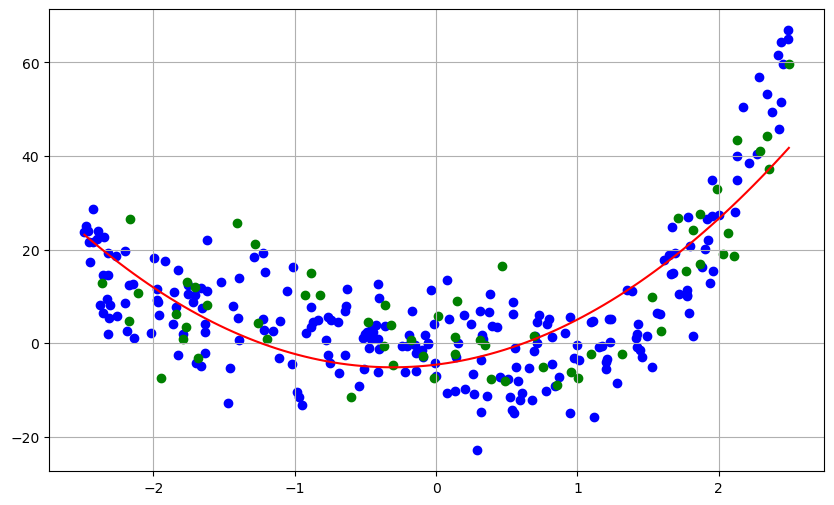

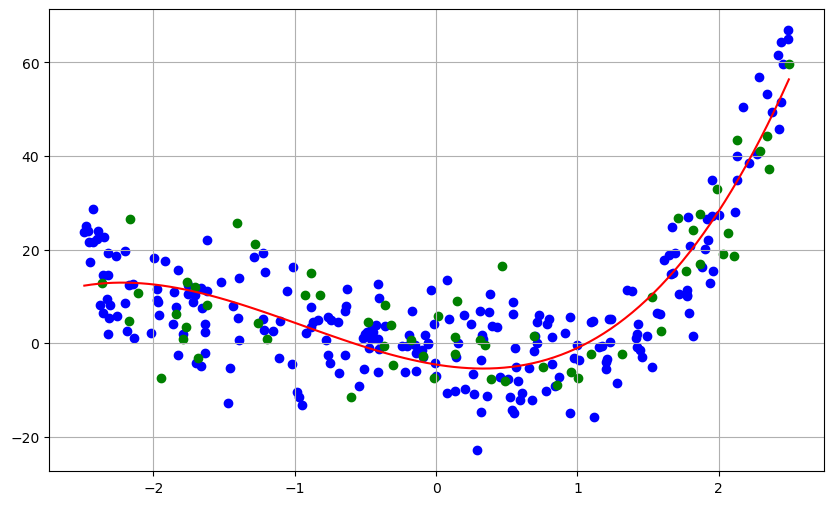

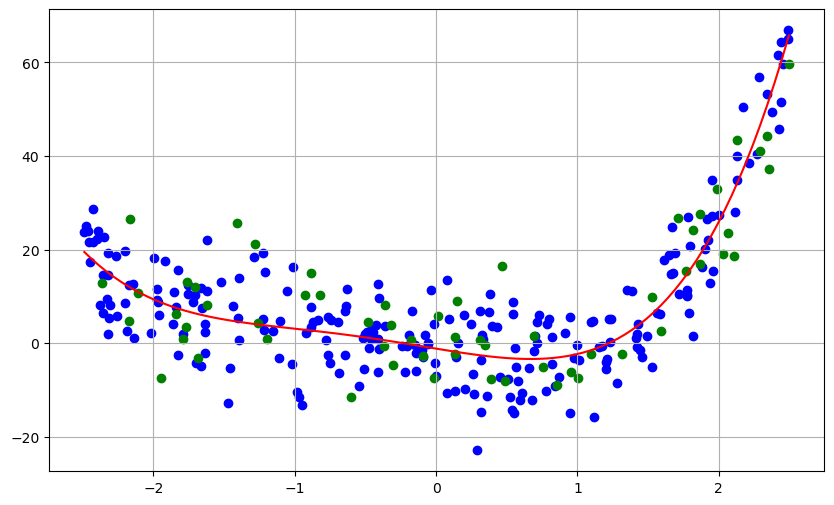

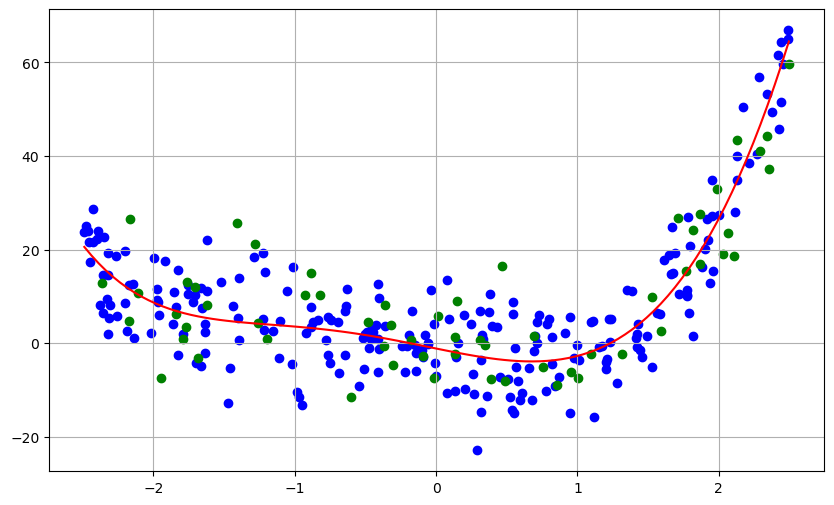

In [20]:
for i in range (2, 6):
    linear_regression(i)

In [21]:
print(poly_reg_err)

[[89.33989547434125, 94.12701934701558], [60.76781118887838, 69.60174471687293], [49.875378151430255, 66.78576902784063], [49.654694632930344, 65.58723360906164]]


In [22]:
import sklearn.neighbors

In [23]:
knn_reg_err = []
knn_regressors = []

def knn(n):
    knn_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=n)
    knn_reg.fit(X_train, y_train)
    knn_regressors.append((knn_reg, None))

    fig = plt.figure(figsize=(15, 10))
    plt.grid()
    
    X_new = np.arange(-3, 3, 0.001).reshape(-1, 1)
    
    plt.scatter(X_train, y_train)
    plt.plot(X_new, knn_reg.predict(X_new), c='red')

    y_train_pred = knn_reg.predict(X_train)
    y_test_pred = knn_reg.predict(X_test)

    knn_reg_err.append([mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)])

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


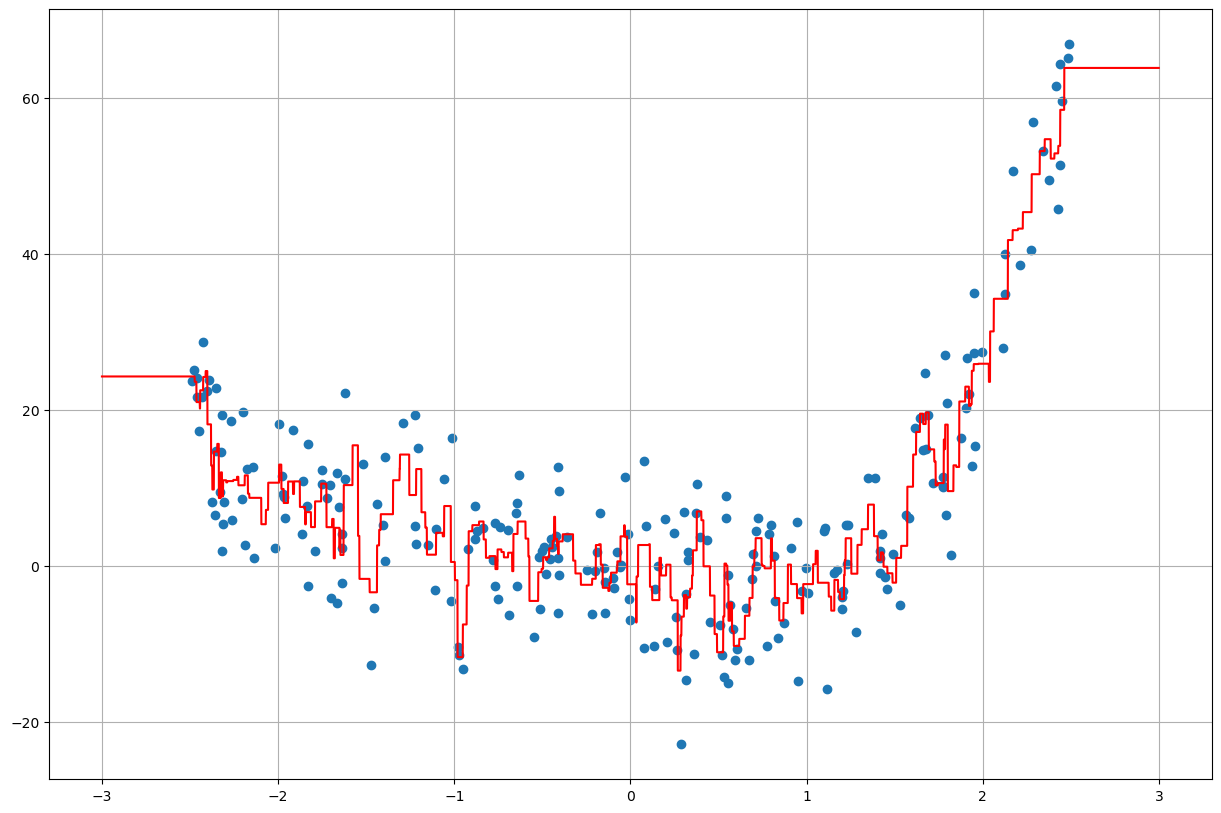

In [24]:
knn(3)

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


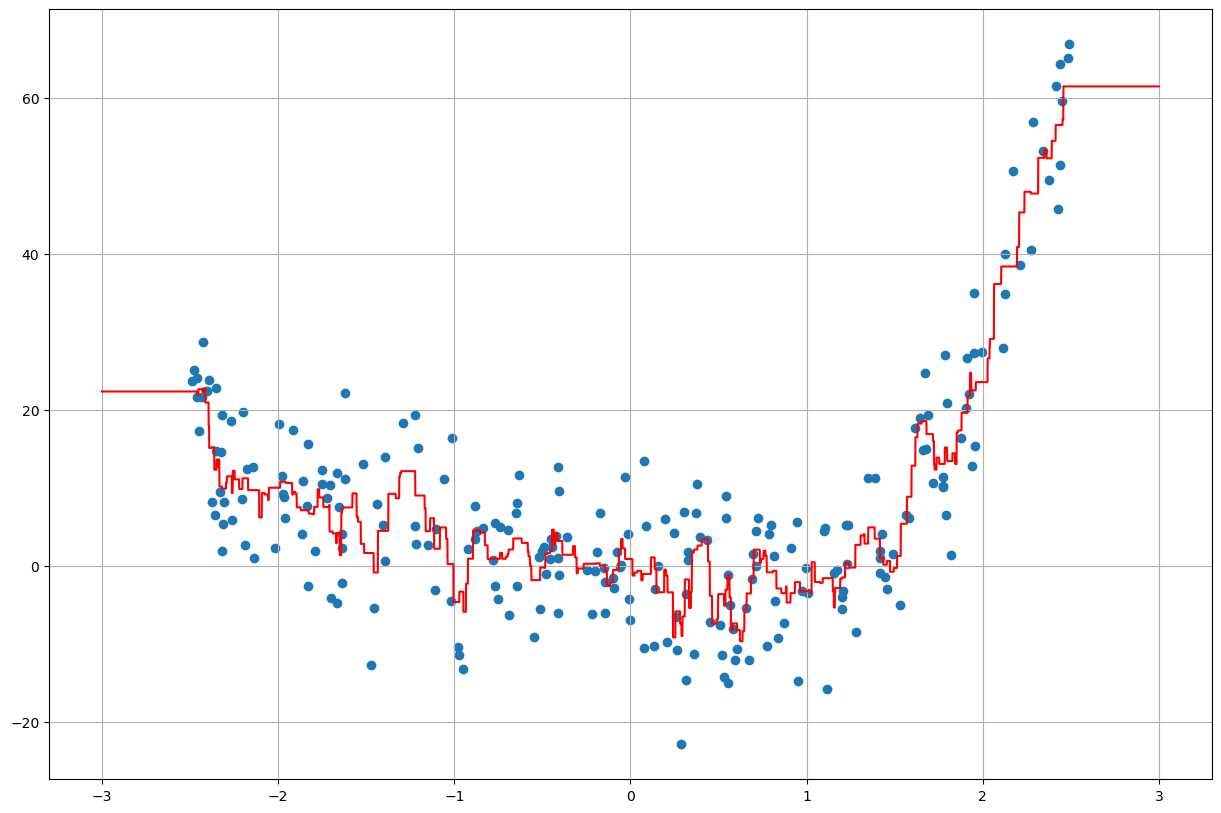

In [25]:
knn(5)

In [26]:
values = np.array([lin_reg_err, knn_reg_err[0], knn_reg_err[1], poly_reg_err[0], poly_reg_err[1], poly_reg_err[2], poly_reg_err[3]])

In [27]:
df_ex01 = pd.DataFrame({'train_mse':[lin_reg_err[0], knn_reg_err[0][0], knn_reg_err[1][0], poly_reg_err[0][0], poly_reg_err[1][0], poly_reg_err[2][0], poly_reg_err[3][0]],
    'test_mse':[lin_reg_err[1], knn_reg_err[0][1], knn_reg_err[1][1], poly_reg_err[0][1], poly_reg_err[1][1], poly_reg_err[2][1], poly_reg_err[3][1]]}, index=['lin_reg', 'knn_3_reg', 'knn_5_reg', 'poly_2_reg', 'poly_3_reg', 'poly_4_reg', 'poly_5_reg'])

In [28]:
df_ex01

,train_mse,test_mse
lin_reg,222.674600,198.810117
knn_3_reg,33.048601,83.500138
knn_5_reg,39.629255,79.510147
poly_2_reg,89.339895,94.127019
poly_3_reg,60.767811,69.601745
poly_4_reg,49.875378,66.785769
poly_5_reg,49.654695,65.587234


In [29]:
df_ex01.to_pickle('mse.pkl')

In [30]:
import pickle

In [31]:
regressors = [
    linear_regressor,
    knn_regressors[0],
    knn_regressors[1],
    poly_regressors[0],
    poly_regressors[1],
    poly_regressors[2],
    poly_regressors[3]
]

In [32]:
regressors

[(LinearRegression(), None),
 (KNeighborsRegressor(n_neighbors=3), None),
 (KNeighborsRegressor(), None),
 (LinearRegression(), PolynomialFeatures(include_bias=False)),
 (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)),
 (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)),
 (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]

In [33]:
with open('reg.pkl', 'wb') as f:
    pickle.dump(regressors, f)